In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import statsmodels.api as sm
import folium
from folium.plugins import MarkerCluster

# the below extension properly formats a cell after it is run
%load_ext nb_black 

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)
import pandas as pd

# Set the maximum number of columns to 200
pd.set_option('display.max_columns', 200)



<IPython.core.display.Javascript object>

In [2]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

<IPython.core.display.Javascript object>

In [3]:
housing_no_na.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolArea', 'P

<IPython.core.display.Javascript object>

In [23]:
# Some key takeaways from running the below:
# SalePrice has a mean value of approximately 178,011 and a standard deviation of approximately 75,042.
# The YearBuilt column has a minimum value of 1872 and a maximum value of 2010, indicating that the
#     houses in the dataset were built over a wide range of years.
# The GrLivArea column has a mean value of approximately 1,486 square feet and a standard deviation
#     of approximately 489 square feet, indicating that there is a wide range in the sizes of the living
#     areas in the houses in the dataset.
# The OverallQual column has a mean value of approximately 6, indicating that most of the houses in the
#     dataset are rated as having an above average overall quality.
# The GarageCars column has a mean value of approximately 1.75, indicating that most of the houses in
#     the dataset have a 1-2 car garage.
# The TotRmsAbvGrd column has a mean value of approximately 6, indicating that most of the houses in
#     the dataset have between 5-7 rooms above ground.
# The Fireplaces column has a mean value of approximately 0.6, indicating that most of the houses in
#     the dataset have at least one fireplace.

housing_cleaned.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178010.891860,57.691860,56.246899,10120.153488,6.046124,5.618605,1970.313953,1983.751938,98.769380,444.174031,53.218217,538.892636,1036.284884,1144.975194,336.820155,0.434884,0.062016,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1878.823643,1.746899,466.661628,95.919767,46.085271,23.214341,16.200388,6.150775,2007.838372
std,1.886626e+08,488.650181,75042.160446,42.802105,33.442906,8126.937892,1.367590,1.122008,29.719705,20.490242,175.546045,429.340844,174.393251,425.249665,418.971677,375.958955,424.072452,0.518768,0.244424,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,430.255846,0.739335,207.640127,129.052016,66.060664,64.107825,56.824783,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129900.000000,20.000000,40.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,214.750000,791.750000,871.750000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1957.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159500.000000,50.000000,61.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1977.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,78.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,157.000000,732.000000,0.000000,784.000000,1266.250000,1364.000000,703.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,1999.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,576.000000,12.000000,2010.000000


<IPython.core.display.Javascript object>

In [24]:
housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2580 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          2580 non-null   object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

<IPython.core.display.Javascript object>

In [25]:
# looks like the recession had little effect on the housing market in Ames
for i in range(1, 4):
    col_name = f"BedroomAbvGr_{i}"
    filtered_data = housing_cleaned.loc[
        housing_cleaned["BedroomAbvGr"] == i, ["SalePrice", "YrSold"]
    ]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby("YrSold").mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")

Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    154153.210526
2007    194558.545455
2008    183832.608696
2009    145451.136364
2010    210285.538462

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    161466.760563
2007    163147.089041
2008    159606.792857
2009    161309.225166
2010    149791.961039

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172470.102273
2007    173514.189911
2008    176426.335593
2009    187344.123529
2010    172955.109827



<IPython.core.display.Javascript object>

Summary Statistics of Sale Price:
count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64


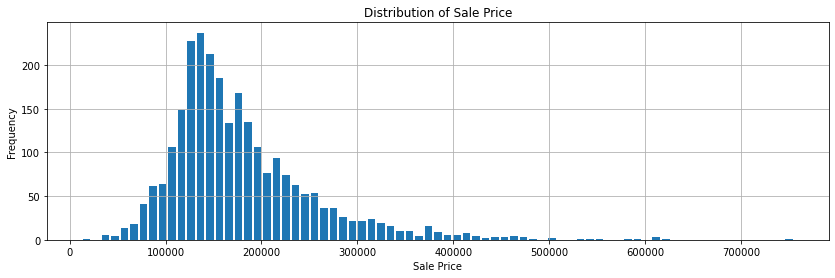

<IPython.core.display.Javascript object>

In [40]:
# Looking at the sale price. Skewed to the left with a long right taill and an outlier of a sale price over 700k

# Calculate the summary statistics of sales price
sales_price_stats = housing_no_na["SalePrice"].describe()

# Print the summary statistics of sales price
print("Summary Statistics of Sale Price:")
print(sales_price_stats)

# Plot the histogram of sales price
housing_no_na["SalePrice"].hist(bins=75, rwidth=0.8, figsize=(14, 4))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

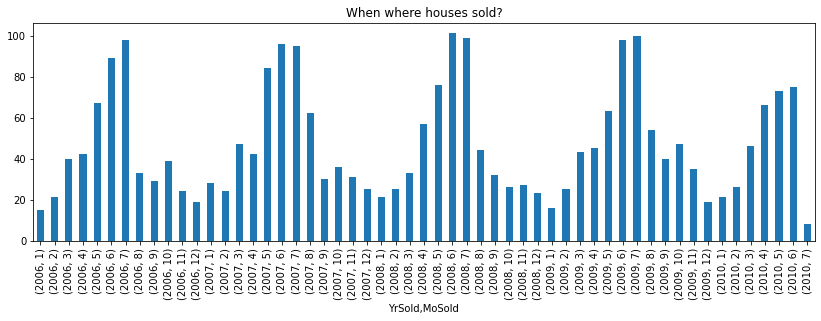

<IPython.core.display.Javascript object>

In [43]:
# Plot the number of houses sold by year and month
# Definitely looks like there is seasonality which would have to be looked into further.
housing_no_na.groupby(["YrSold", "MoSold"]).PID.count().plot(
    kind="bar", figsize=(14, 4)
)
plt.title("When houses were sold")
plt.show()

Summary Statistics of GrLivArea:
count    2580.000000
mean     1486.039922
std       488.650181
min       334.000000
25%      1112.000000
50%      1436.000000
75%      1733.000000
max      4676.000000
Name: GrLivArea, dtype: float64


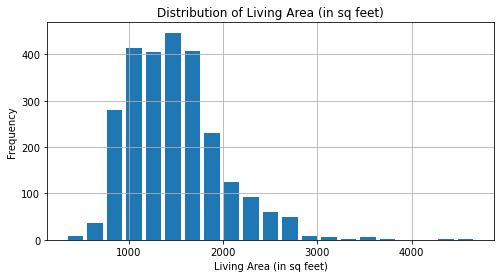

<IPython.core.display.Javascript object>

In [44]:
# looking at the size of the houses sold.  Distribution has a long right tail
# Calculate the summary statistics of GrLivArea
gr_liv_area_stats = housing_no_na["GrLivArea"].describe()

# Print the summary statistics of GrLivArea
print("Summary Statistics of GrLivArea:")
print(gr_liv_area_stats)

# Plot the histogram of GrLivArea
housing_no_na["GrLivArea"].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Distribution of Living Area (in sq feet)')
plt.xlabel('Living Area (in sq feet)')
plt.ylabel('Frequency')
plt.show()


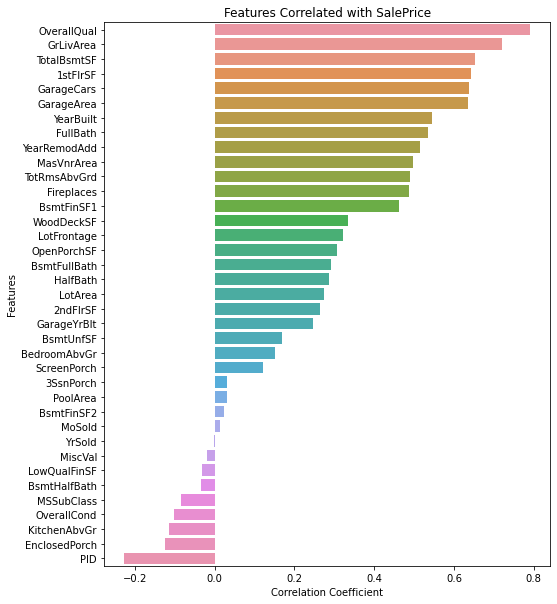

<IPython.core.display.Javascript object>

In [45]:
# strong correlation with a few features. Looks like SF might be better to combine in to total SF

# Calculate the correlation matrix
corr = housing_no_na.corr()

# Sort the features by correlation to SalePrice from positive to negative
corr_sorted = corr.sort_values("SalePrice", ascending=False)

# Plot the features sorted by correlation to SalePrice
plt.figure(figsize=(8, 10))
sns.barplot(x=corr_sorted["SalePrice"][1:], y=corr_sorted.index[1:], orient="h")
plt.title("Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

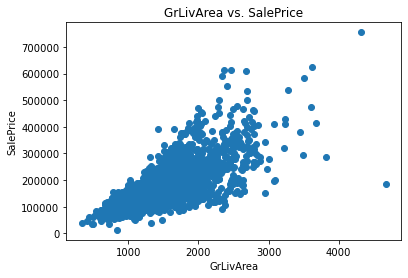

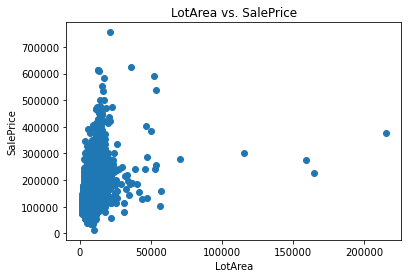

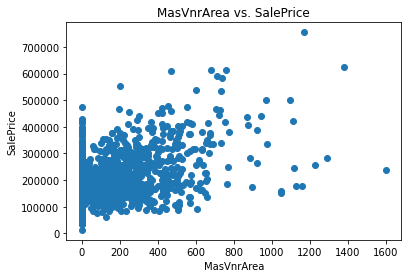

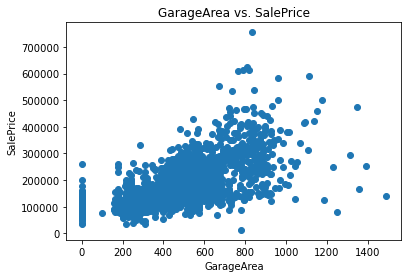

<IPython.core.display.Javascript object>

In [6]:
# taking a look at how the Area features relate to SalePrice

for column in housing_cleaned.columns:
    if "Area" in column:
        plt.scatter(housing_cleaned[column], housing_cleaned["SalePrice"])
        plt.title(f"{column} vs. SalePrice")
        plt.xlabel(column)
        plt.ylabel("SalePrice")
        plt.show()


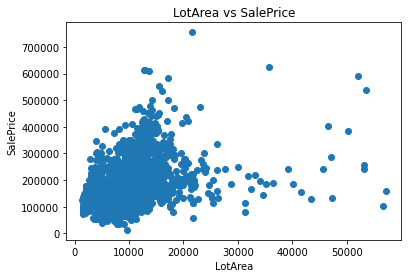

<IPython.core.display.Javascript object>

In [27]:
# after removing outliers it seems that lot area has less of an effect than expected

# Filter the DataFrame to remove the outliers
df_filtered = housing_cleaned[housing_cleaned['LotArea'] <= 60000]

# Plot the scatterplot of LotArea vs SalePrice
plt.scatter(df_filtered['LotArea'], df_filtered['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


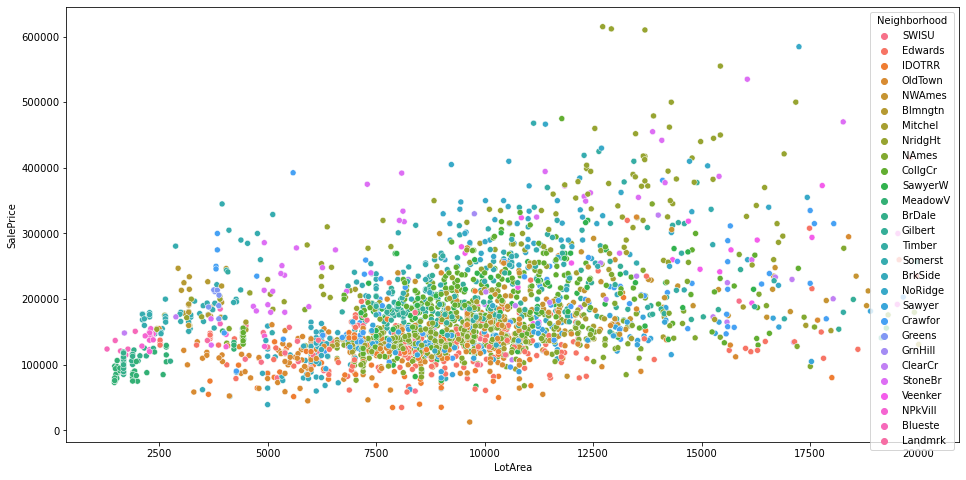

<IPython.core.display.Javascript object>

In [28]:
# when factoring in the neighborhood it looks like there is more of a relationship with lot area and sale price

# Filter out outliers with LotArea above 20000 to zoom in on the gaph
filtered = housing_cleaned[housing_cleaned['LotArea'] <= 20000]

# Create a scatterplot of LotArea vs SalePrice, colored by Neighborhood
plt.figure(figsize=(16, 8))
sns.scatterplot(data=filtered, x='LotArea', y='SalePrice', hue='Neighborhood')
plt.show()


In [17]:
# Taking a closer look at the neighborhoods
neighborhood_stats = housing_cleaned.groupby('Neighborhood')['SalePrice'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_stats.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max     min      mean
Neighborhood                                 
NoRidge          67  755000  190000  326114.0
NridgHt         121  615000  154000  313662.0
StoneBr          43  591587  130000  305308.0
GrnHill           2  330000  230000  280000.0
Veenker          23  385000  150000  251263.0
Timber           54  425000  150000  242850.0
Somerst         143  468000  139000  228762.0
ClearCr          40  328000  107500  213958.0
Crawfor          93  392500   90350  201942.0
CollgCr         236  475000  110000  198104.0
Blmngtn          23  246990  159895  196237.0
Greens            8  214000  155000  193531.0
NWAmes          123  306000   82500  190330.0
Gilbert         143  377500  114250  189402.0
SawyerW         113  320000   67500  188075.0
Mitchel         104  300000   81500  162602.0
NAmes           410  345000   68000  144960.0
Blueste          10  200000  115000  143590.0
NPkVill          22  155000  120000  140743.0
Sawy

<IPython.core.display.Javascript object>

In [31]:
# Group the data by neighborhood
grouped = housing_cleaned.groupby('Neighborhood')

# Iterate over each group
for name, group in grouped:
    # Exclude features that have "area" in the feature name and SalePrice or PID
    features = [col for col in group.columns if 'Area' not in col and 'SF' not in col and col != 'SalePrice' and col != 'PID']

#     features = [col for col in group.columns if 'Area' not in col and col != 'SalePrice' and col != 'PID']
    # Calculate the correlation coefficients between sale price and each feature
    correlations = group[features].corrwith(group['SalePrice'])
    # Get the absolute values of the correlation coefficients and sort in descending order
    correlations = correlations.abs().sort_values(ascending=False)
    # Print the name of the most important feature for predicting sale price in this neighborhood
    print(f'Most important feature for {name}: {correlations.index[0]}')


Most important feature for Blmngtn: BsmtFullBath
Most important feature for Blueste: LotFrontage
Most important feature for BrDale: TotRmsAbvGrd
Most important feature for BrkSide: OverallQual
Most important feature for ClearCr: OverallQual
Most important feature for CollgCr: OverallQual
Most important feature for Crawfor: OverallQual
Most important feature for Edwards: Fireplaces
Most important feature for Gilbert: GarageCars
Most important feature for Greens: TotRmsAbvGrd
Most important feature for GrnHill: YearBuilt
Most important feature for IDOTRR: OverallQual
Most important feature for Landmrk: MSSubClass
Most important feature for MeadowV: OverallQual
Most important feature for Mitchel: OverallQual
Most important feature for NAmes: OverallQual
Most important feature for NPkVill: MSSubClass
Most important feature for NWAmes: TotRmsAbvGrd
Most important feature for NoRidge: FullBath
Most important feature for NridgHt: OverallQual
Most important feature for OldTown: OverallQual
Mos

/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


<IPython.core.display.Javascript object>

In [18]:
# checking for highly inbalanced distributions
for col in housing_no_na.columns:
    value_counts = housing_no_na[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.27%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%
Column MiscVal has highest frequency of 96.32%


<IPython.core.display.Javascript object>

In [19]:
# checking for correlation among the variables with highly inbalanced distributions
high_freq_cols = [
    "Street",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "Heating",
    "LowQualFinSF",
    "KitchenAbvGr",
    "3SsnPorch",
    "PoolArea",
    "PoolQC",
    "MiscFeature",
    "MiscVal",
]

# create a subset of the housing_no_na dataframe with only the selected columns
subset = housing_no_na[high_freq_cols]

# create a correlation matrix
corr_matrix = subset.corr()

# display the correlation matrix
print(corr_matrix)

              LowQualFinSF  KitchenAbvGr  3SsnPorch  PoolArea   MiscVal
LowQualFinSF      1.000000     -0.014375  -0.002534 -0.005239 -0.005184
KitchenAbvGr     -0.014375      1.000000  -0.019766 -0.010906  0.040088
3SsnPorch        -0.002534     -0.019766   1.000000 -0.005441  0.001152
PoolArea         -0.005239     -0.010906  -0.005441  1.000000  0.021245
MiscVal          -0.005184      0.040088   0.001152  0.021245  1.000000


<IPython.core.display.Javascript object>

In [20]:
housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
].dtypes

Street          object
Utilities       object
LandSlope       object
Condition2      object
RoofMatl        object
Heating         object
LowQualFinSF     int64
KitchenAbvGr     int64
3SsnPorch        int64
PoolArea         int64
PoolQC          object
MiscFeature     object
MiscVal          int64
dtype: object

<IPython.core.display.Javascript object>

In [21]:
# define the independent and dependent variables
X = housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
]
y = housing_no_na["SalePrice"]

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.098
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.92e-32
Time:                        10:42:16   Log-Likelihood:                -32502.
No. Observations:                2580   AIC:                         6.508e+04
Df Residuals:                    2544   BIC:                         6.529e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.521e+04   4.18e+0

<IPython.core.display.Javascript object>

In [5]:
# It appears that only a few of the features have a statistically significant relationship with the SalePrice. 
# These features have a p-value less than 0.05 and indicate that there is a high likelihood that 
# the coefficient is not equal to zero. These features are: Street, Utilities, LandSlope, Condition2,
# RoofMatl, Heating, PoolQC, and KitchenAbvGr. 

# I am going to drop the columns with no relationship with the sale price and highly imbalanced distributions. 

columns_to_drop = ["3SsnPorch", "PoolArea", "MiscFeature", "LowQualFinSF"]
housing_cleaned = housing_no_na.drop(columns_to_drop, axis=1)

# since i removed the misc house features Im also going to remove the value of these items
housing_cleaned['SalePrice'] = housing_cleaned['SalePrice'] - housing_cleaned['MiscVal']

# and will now remove the MiscVal column
housing_cleaned.drop('MiscVal', axis=1, inplace=True)



 


<IPython.core.display.Javascript object>

In [ ]:
housing = pd.read_csv("../data/housing_no_na.csv", index_col=0)

In [90]:
# saving updated locations file
locations.to_csv("data/locations.csv", index=False)

<IPython.core.display.Javascript object>

In [ ]:
housing_cleaned[housing_cleaned.duplicated(subset=["PID"], keep=False)]

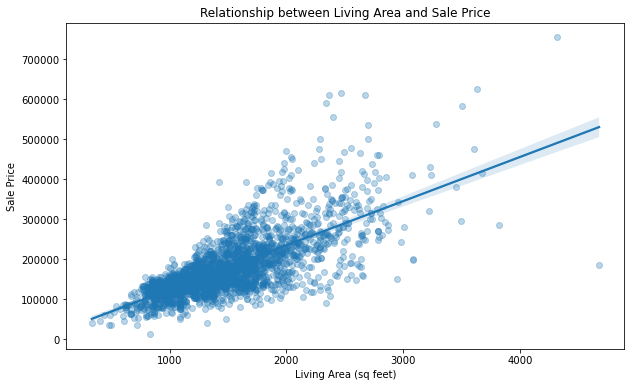

<IPython.core.display.Javascript object>

In [47]:
# Looking at outliers

# Plot the regression between GrLivArea and SalePrice
plt.figure(figsize=(10,6))
sns.regplot(x=housing_cleaned['GrLivArea'], y=housing_cleaned['SalePrice'], scatter_kws={'alpha':0.3})
plt.title('Relationship between Living Area and Sale Price')
plt.xlabel('Grand Living Area (sq feet)')
plt.ylabel('Sale Price')
plt.show()

In [48]:
housing_cleaned[housing_cleaned["GrLivArea"] > 4000]



,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
309,908154205,4676,184750,60,RL,130.0,40094,Pave,No_Alley,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,No_Pool,No_Fence,10,2007,New,Partial
1007,528351010,4316,755000,60,RL,104.0,21535,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,No_Pool,No_Fence,1,2007,WD,Normal


<IPython.core.display.Javascript object>

In [49]:
# dropping the two outliers

# Drop the observations with GrLivArea > 4000
housing_cleaned = housing_cleaned[housing_cleaned["GrLivArea"] <= 4000]



<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}>

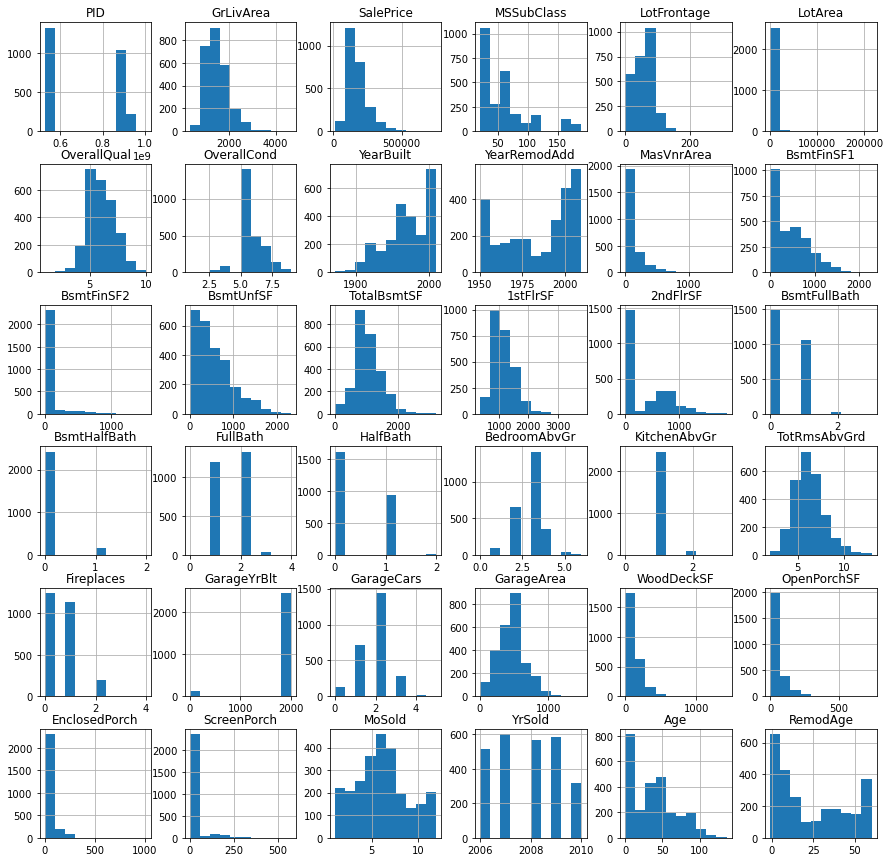

<IPython.core.display.Javascript object>

In [67]:
# taking a look at the numeric features
numeric_features = housing_cleaned.select_dtypes(include=[np.number])
numeric_features.hist(figsize=(15, 15))

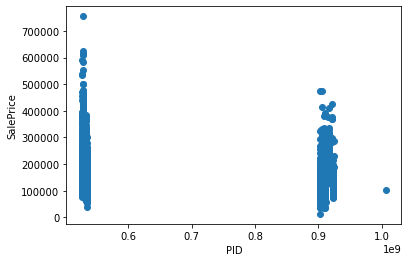

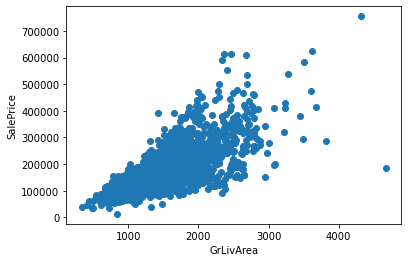

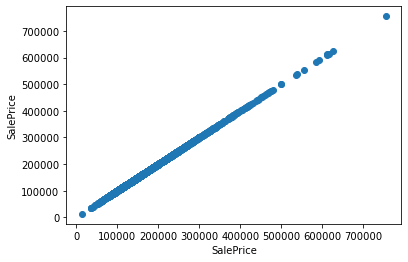

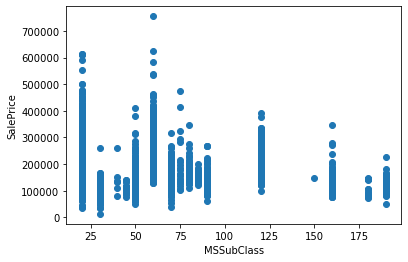

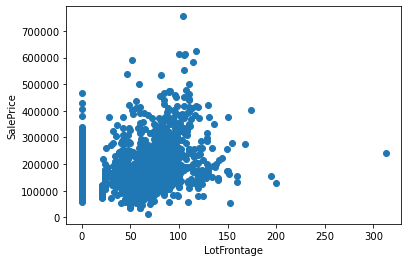

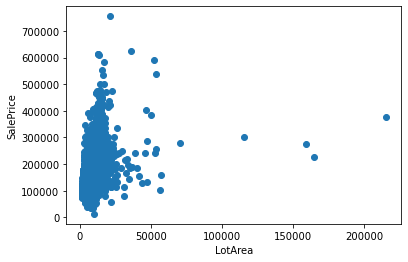

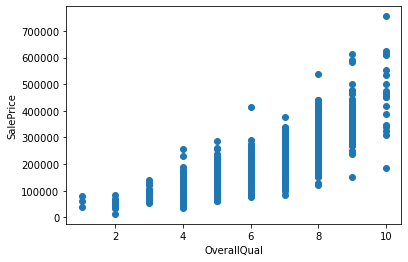

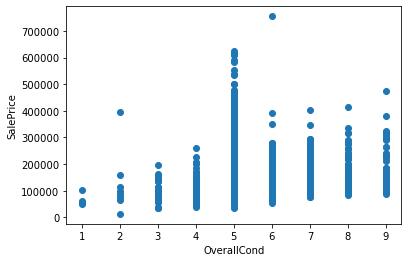

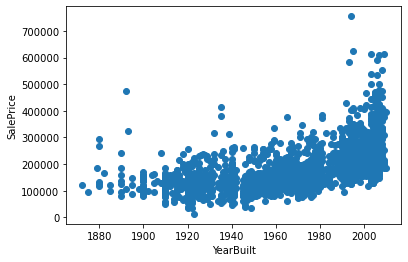

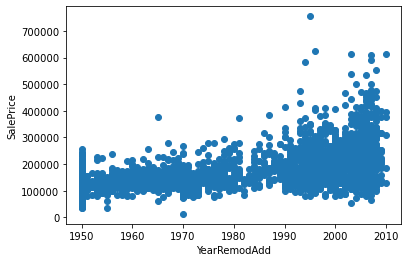

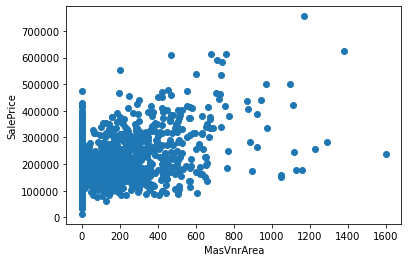

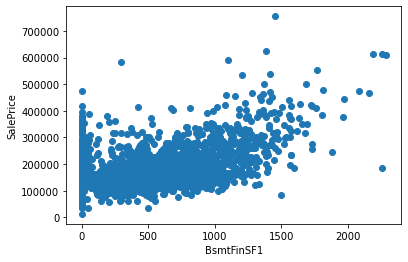

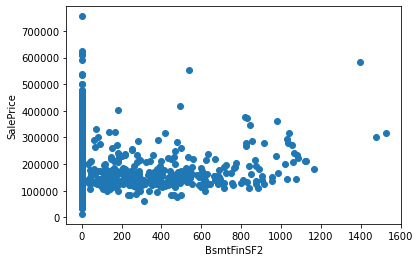

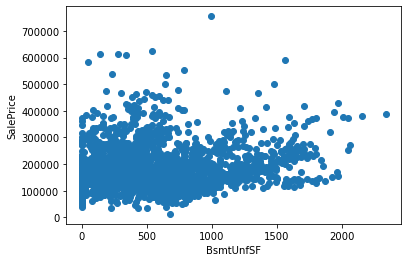

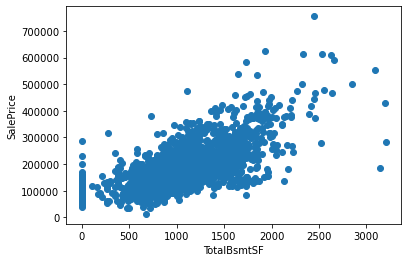

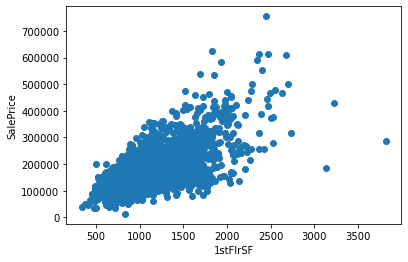

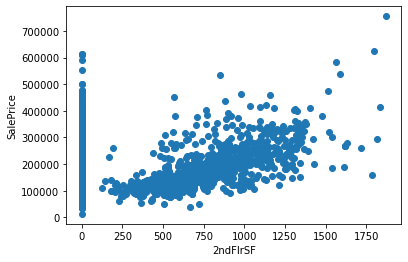

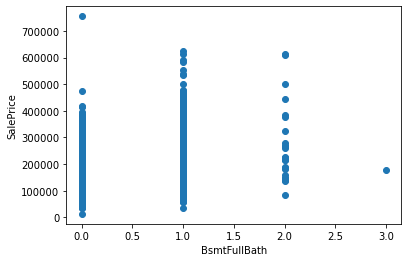

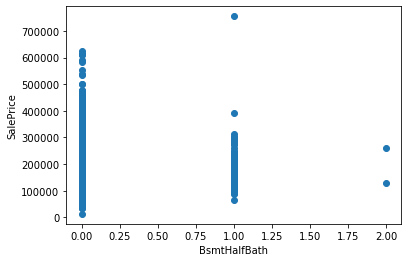

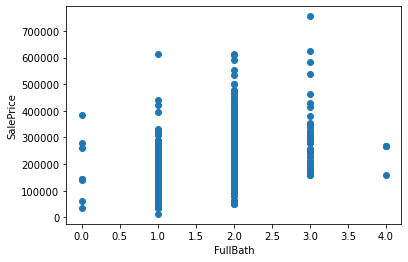

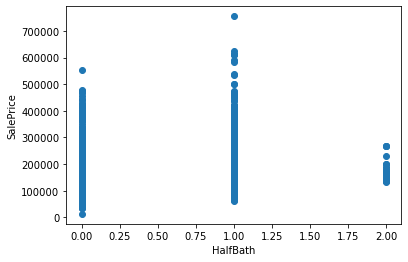

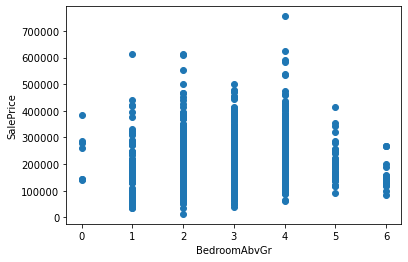

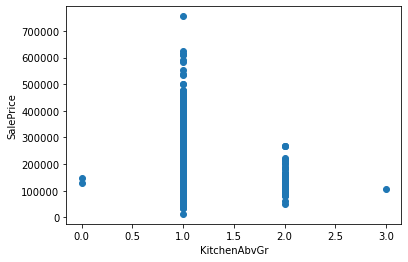

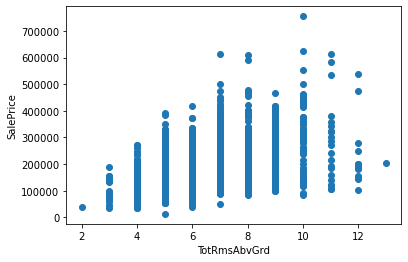

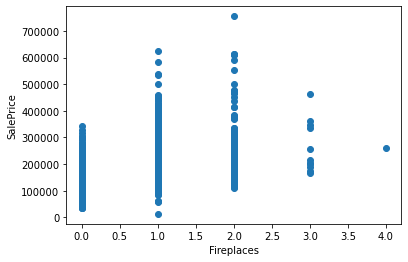

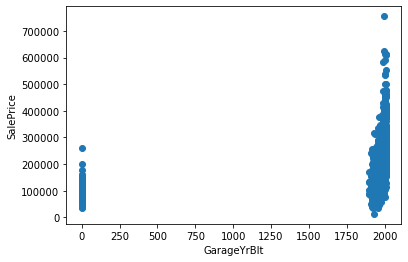

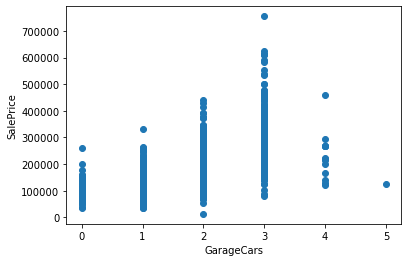

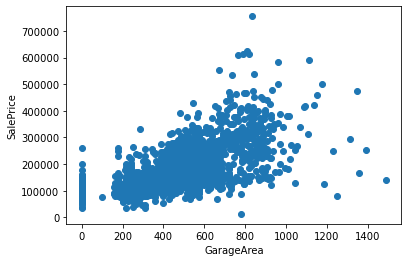

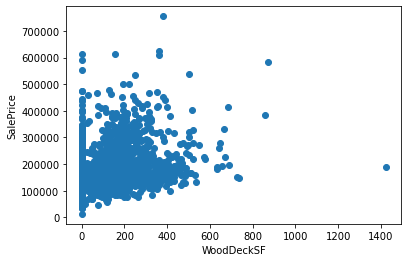

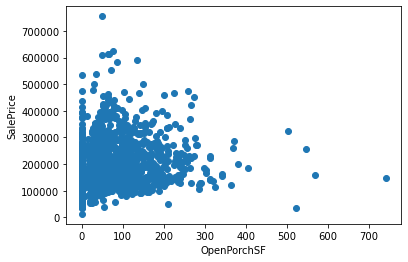

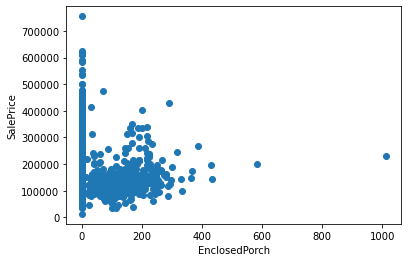

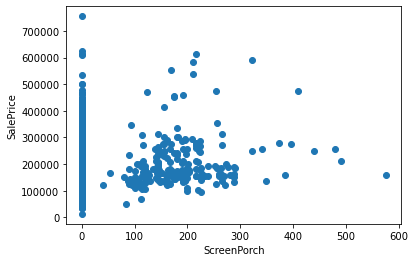

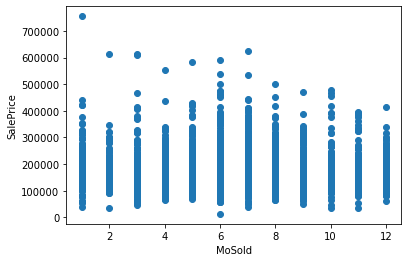

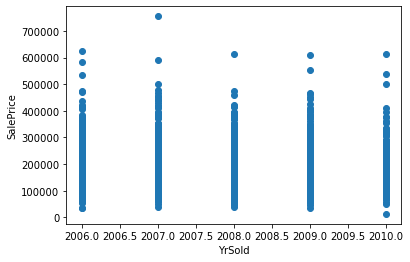

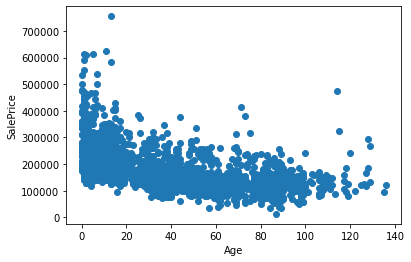

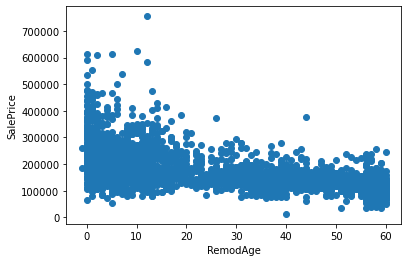

<IPython.core.display.Javascript object>

In [68]:
# Visualizing relationship between features and target value
# Looking at the scatterplots there seems to be a linear relationship with GrLivArea, OverallQual, TotalBsmtSF, 
# 1stFlrSF, maybe Fireplaces, maybe GarageCars and GarageArea
target_variable = housing_cleaned.loc[:, 'SalePrice']


for col in numeric_features.columns:
    plt.scatter(housing_cleaned[col], target_variable)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()


In [69]:
corr_matrix = housing_cleaned.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790556
GrLivArea        0.719901
TotalBsmtSF      0.652451
1stFlrSF         0.642564
GarageCars       0.638600
GarageArea       0.634761
YearBuilt        0.544471
FullBath         0.535041
YearRemodAdd     0.514344
MasVnrArea       0.498502
TotRmsAbvGrd     0.490073
Fireplaces       0.488220
BsmtFinSF1       0.460905
WoodDeckSF       0.333051
OpenPorchSF      0.306385
BsmtFullBath     0.290870
HalfBath         0.285719
LotArea          0.274136
2ndFlrSF         0.263091
GarageYrBlt      0.246218
LotFrontage      0.177295
BsmtUnfSF        0.168174
BedroomAbvGr     0.151681
ScreenPorch      0.121422
BsmtFinSF2       0.022691
MoSold           0.012650
YrSold          -0.001504
BsmtHalfBath    -0.033767
MSSubClass      -0.084394
OverallCond     -0.101382
KitchenAbvGr    -0.114226
EnclosedPorch   -0.123316
PID             -0.226093
RemodAge        -0.515498
Age             -0.544376
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>

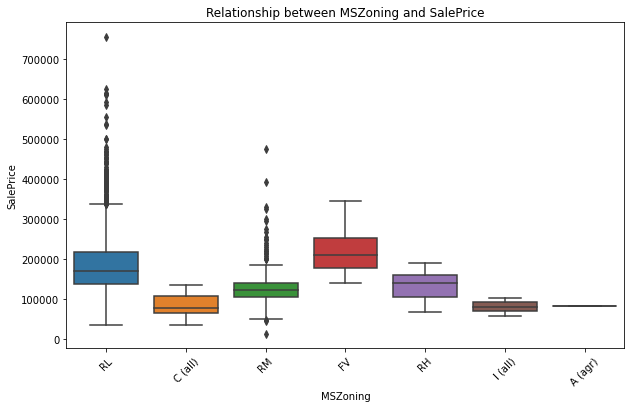

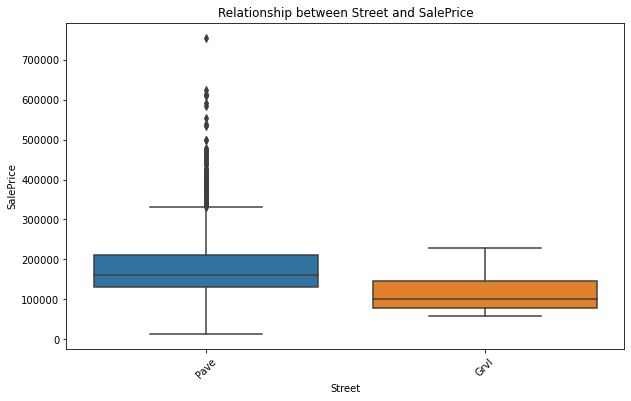

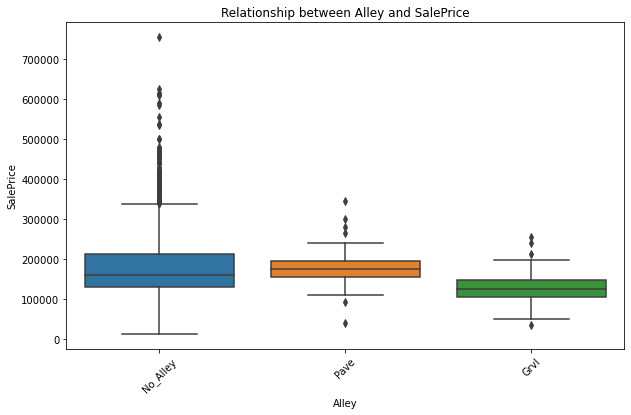

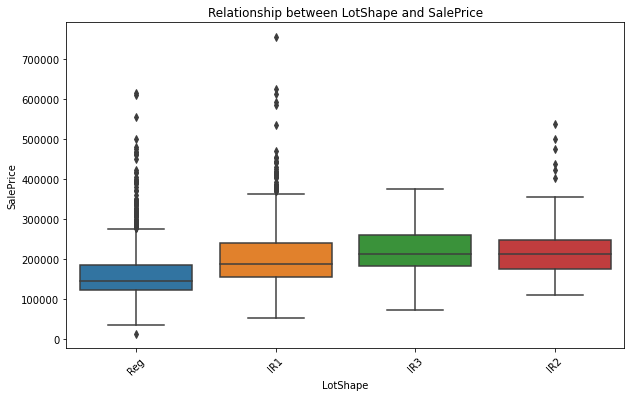

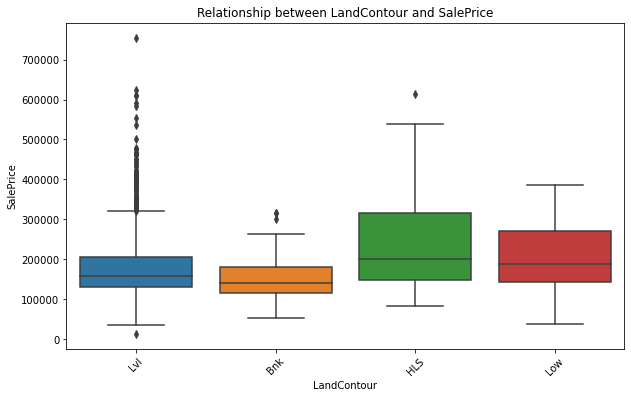

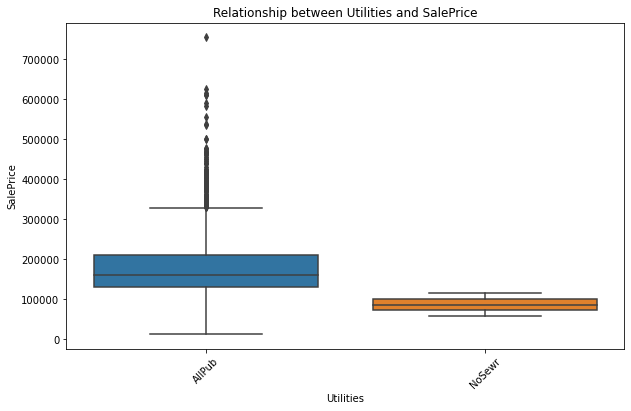

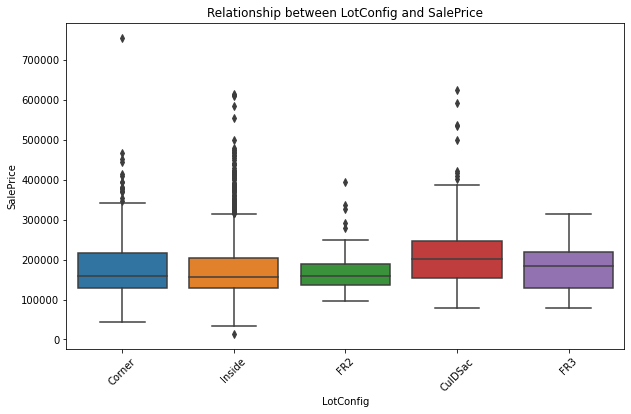

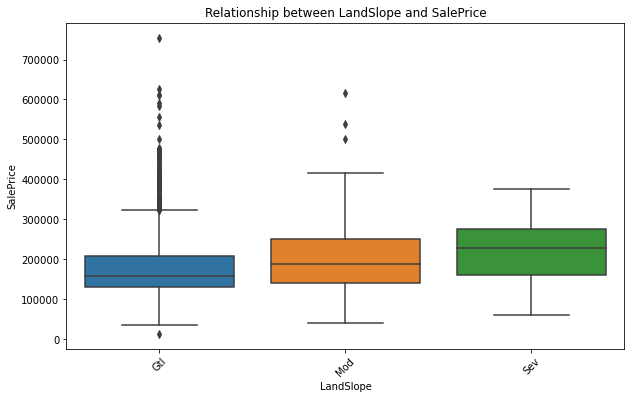

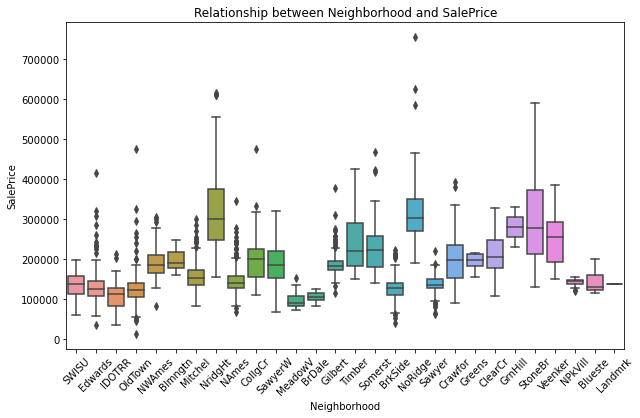

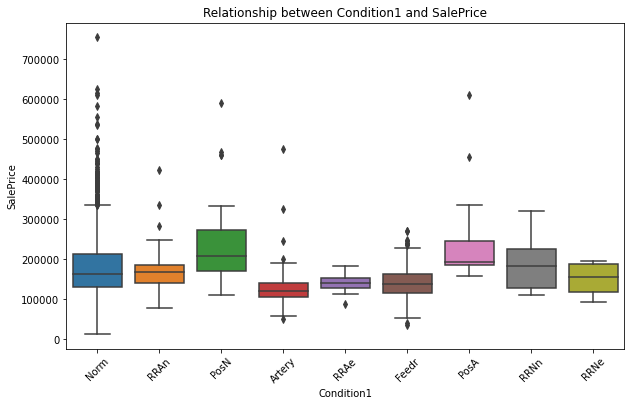

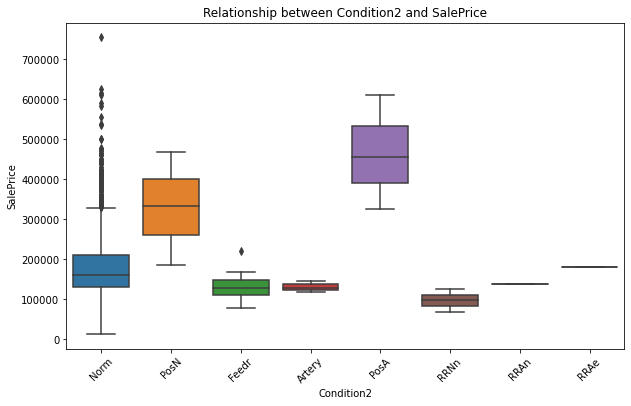

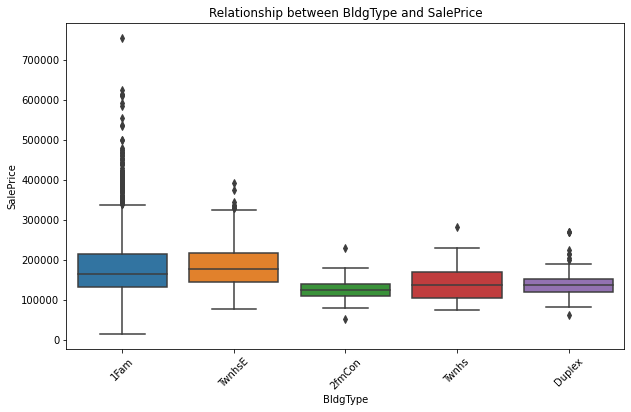

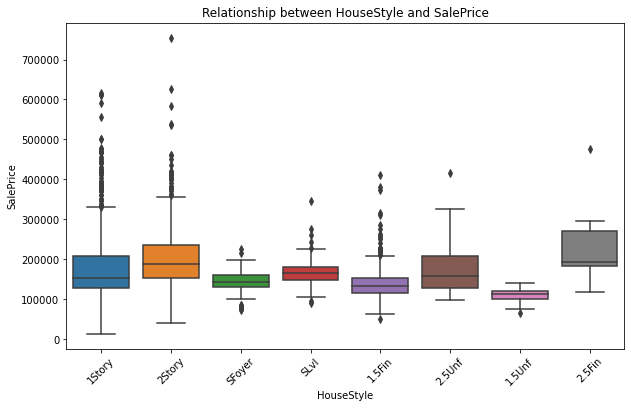

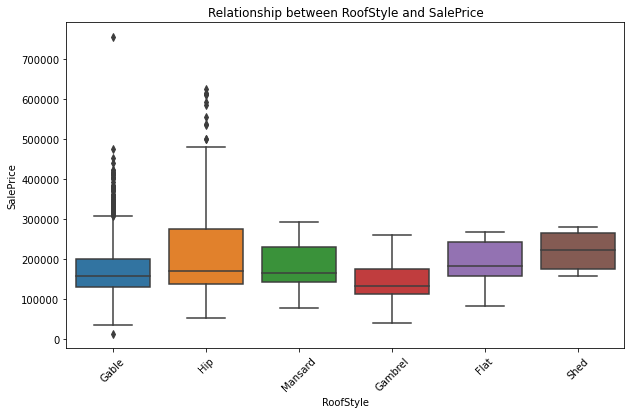

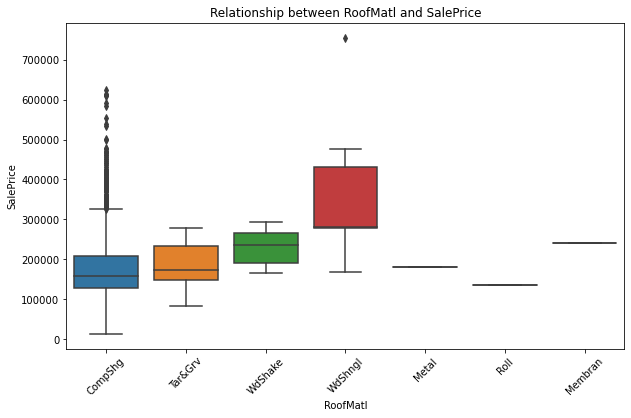

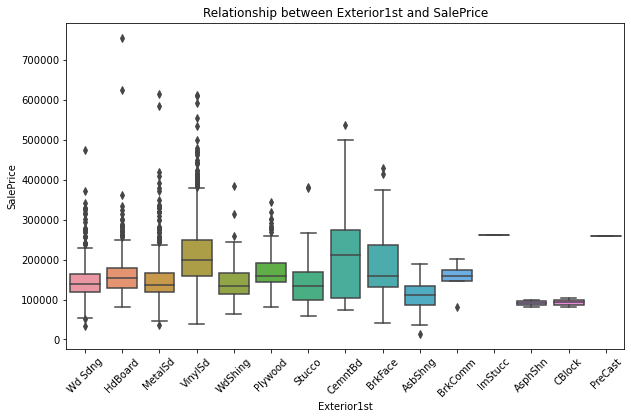

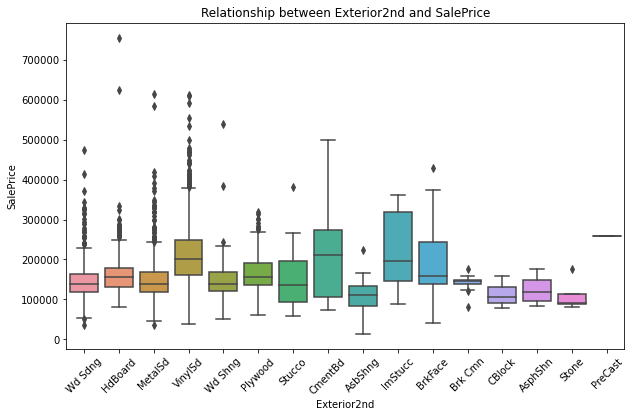

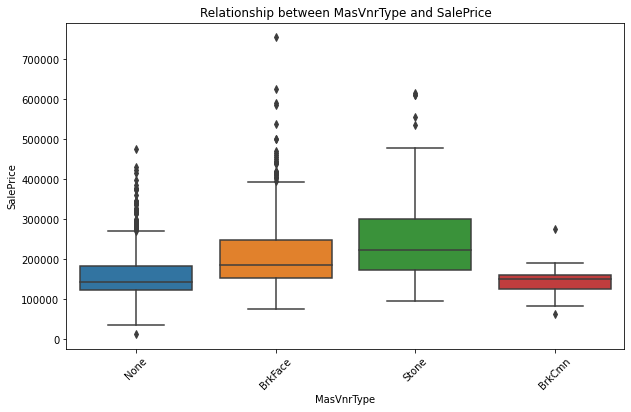

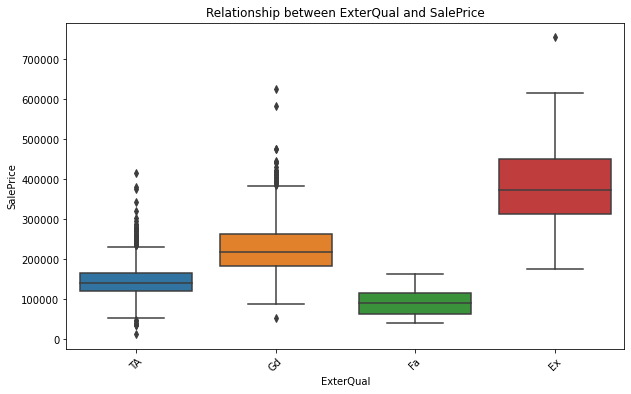

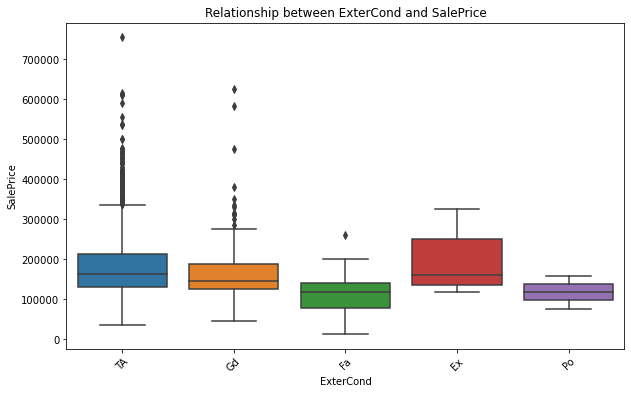

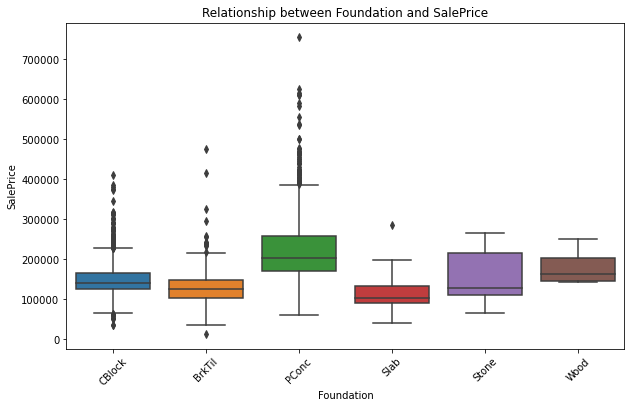

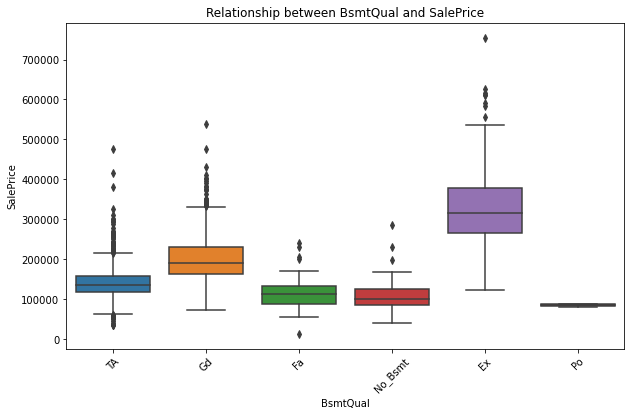

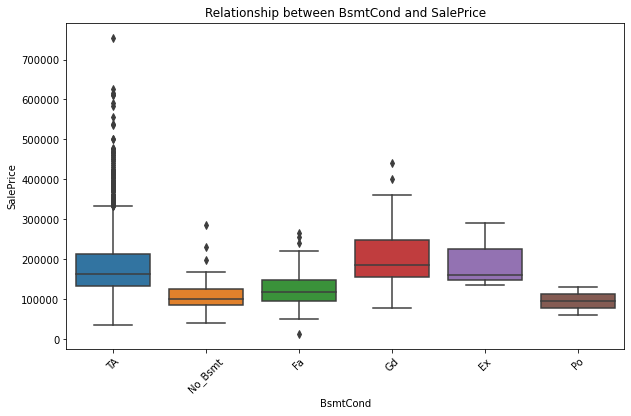

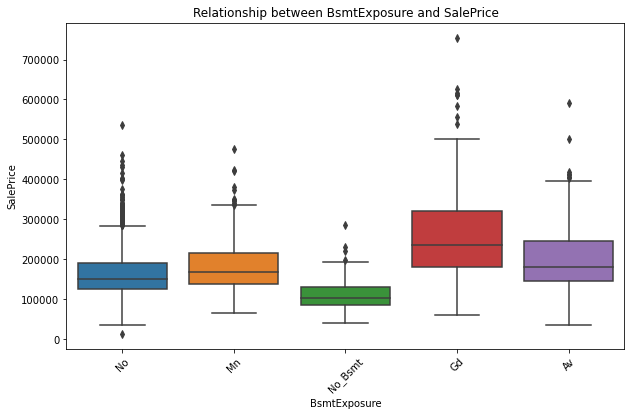

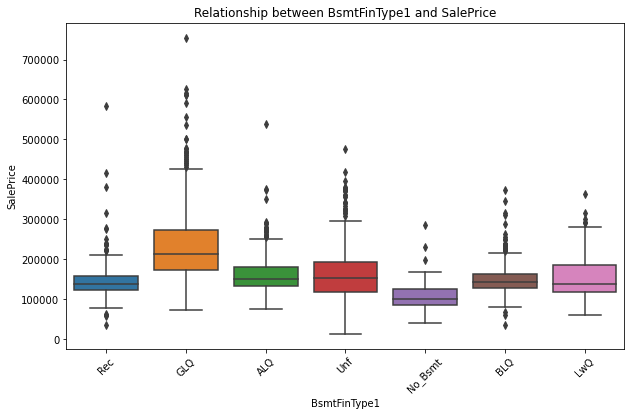

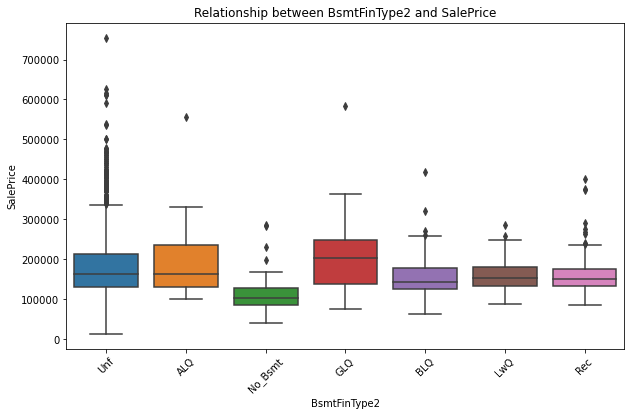

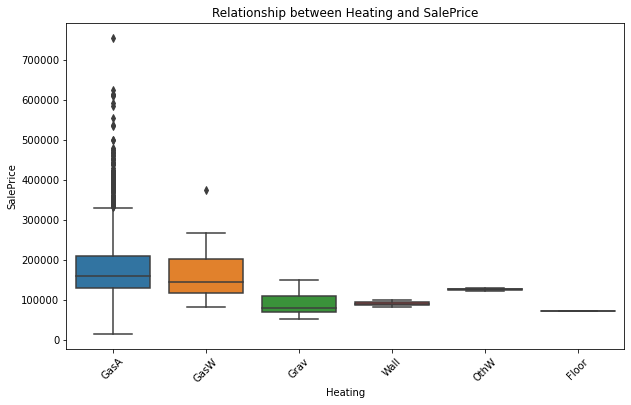

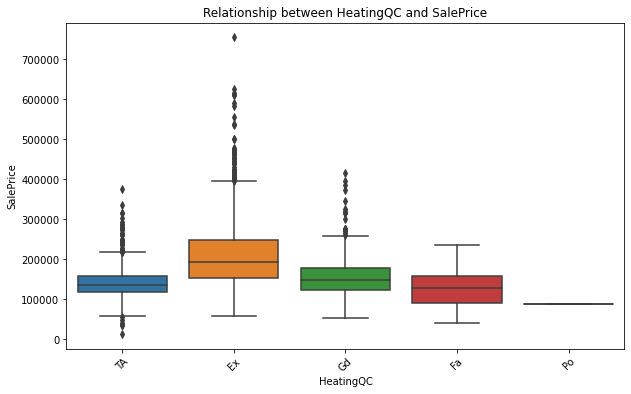

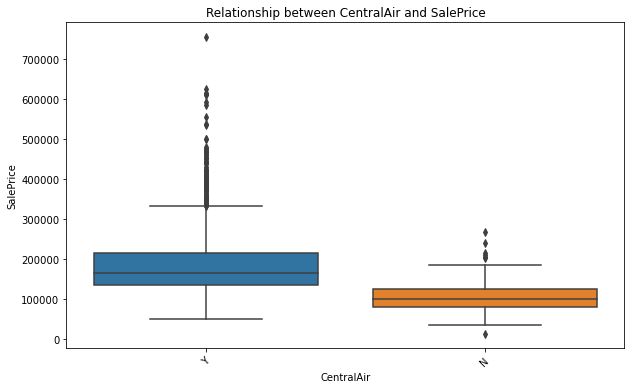

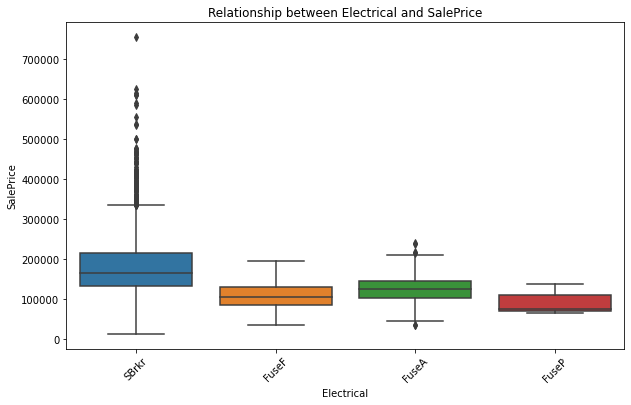

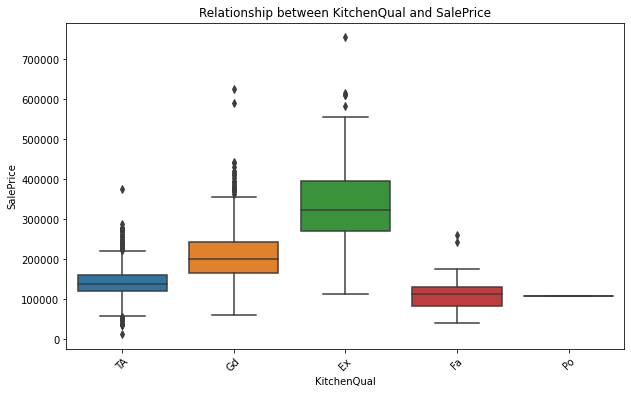

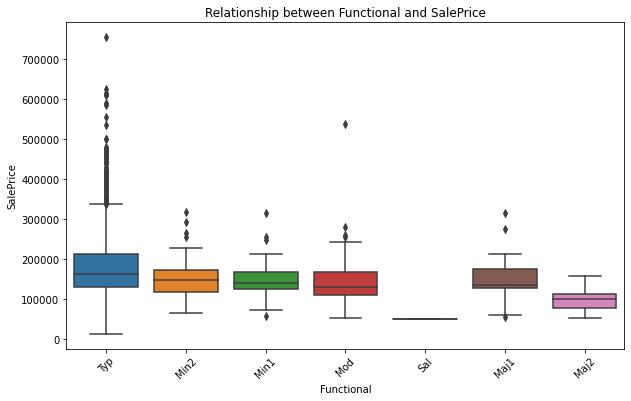

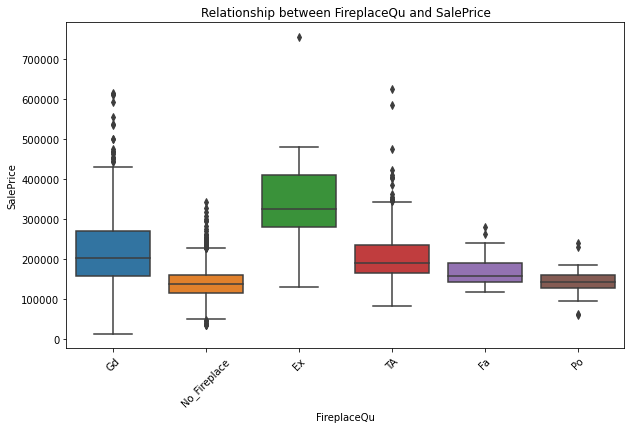

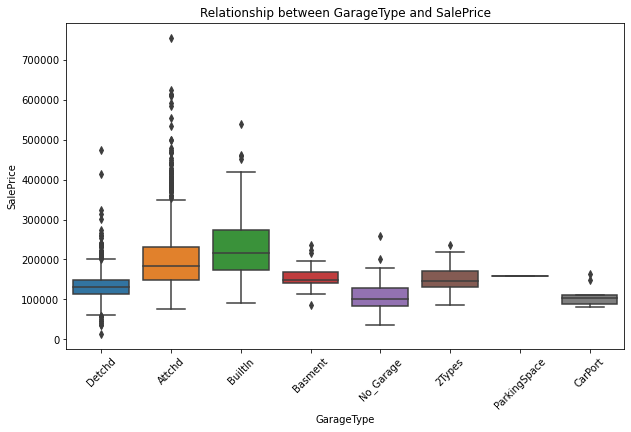

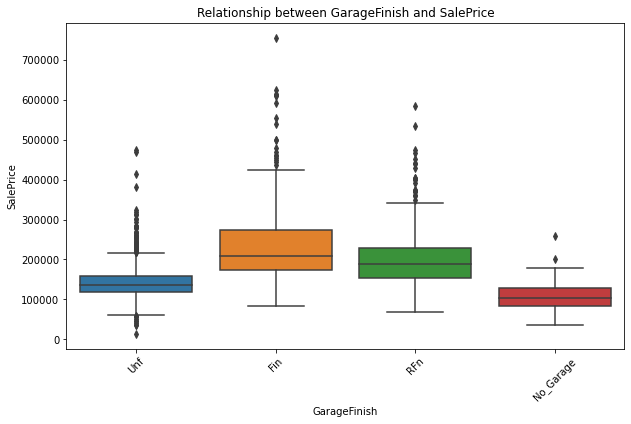

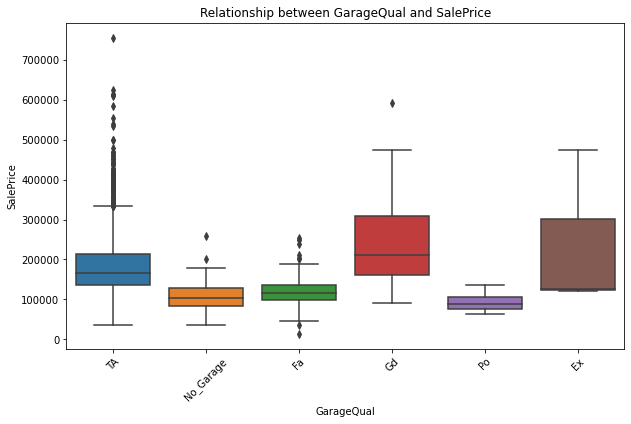

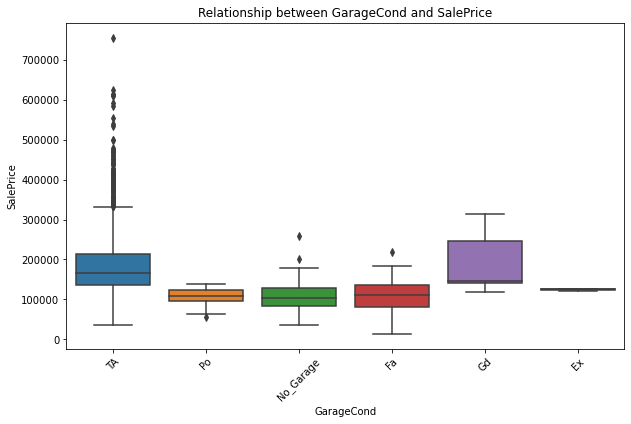

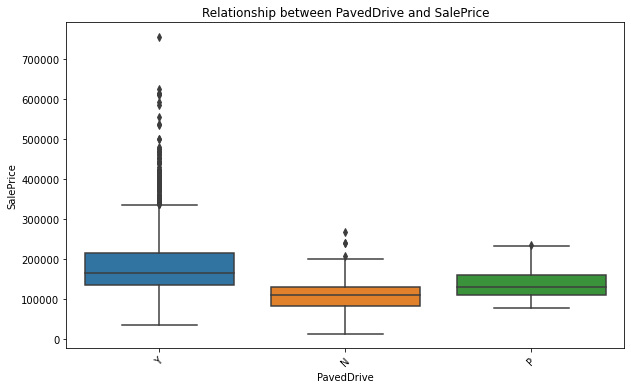

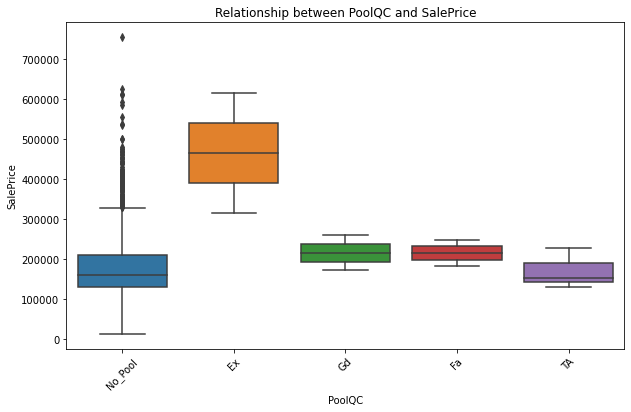

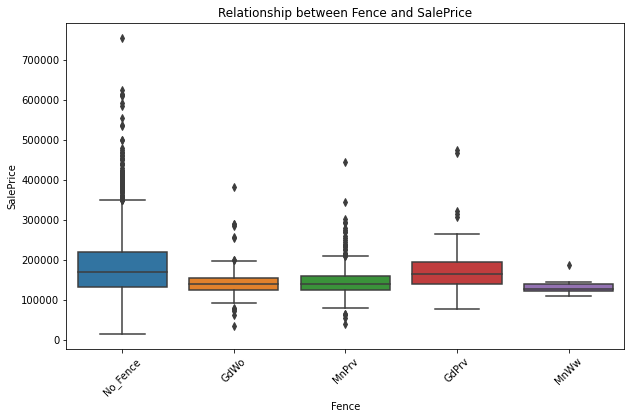

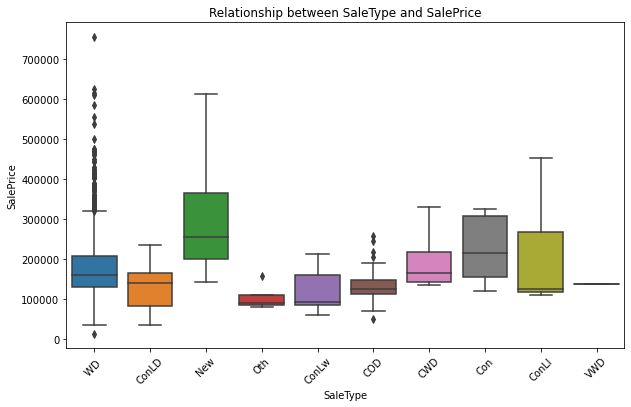

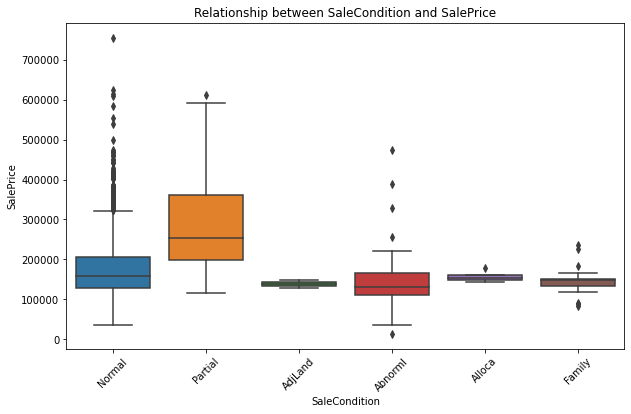

<IPython.core.display.Javascript object>

In [72]:
# boxplot for categorical features
# categories with that show little overlap and could be a strong predictor of the sale price:
# MSZoning(maybe), Neighborhood, RoofMat1(maybe), MasVnrType(maybe), ExterQual, CentralAir(maybe), 
# KitchenQual(maybe), SaleType(maybe,), 

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=housing_cleaned)
    plt.xticks(rotation=45)
    plt.title('Relationship between {} and SalePrice'.format(col))
    plt.show()


In [66]:
# Adding two more features to take into account the time since house was built or remodeled 
# in relation to the year it was sold. 
housing_cleaned['Age'] = housing_cleaned['YrSold'] - housing_cleaned['YearBuilt']
housing_cleaned['RemodAge'] = housing_cleaned['YrSold'] - housing_cleaned['YearRemodAdd']


# Creating a binary feature if the house was remodeled
housing_cleaned['Remodeled'] = (housing_cleaned['YearBuilt'] != housing_cleaned['YearRemodAdd']).astype(int)

<IPython.core.display.Javascript object>

In [10]:
# creating a feature that has the total SF
housing_cleaned['TotalSF'] = housing_cleaned['GrLivArea'] + housing_cleaned['TotalBsmtSF']


<IPython.core.display.Javascript object>

In [12]:
# creating a total SF for porch, I dropped the 3SsnPorch column earlier so i will have to add it back in first
housing = pd.read_csv("data/Ames_Housing_Price_Data.csv", index_col=0)
#merging the column to housing_cleaned
housing_cleaned = housing_cleaned.merge(housing[['PID', '3SsnPorch']], on='PID', how='left')

porch_columns = ['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch']

housing_cleaned['TotalPorchSF'] = housing_cleaned[porch_columns].sum(axis=1)
# deleting the column 
housing_cleaned = housing_cleaned.drop('3SsnPorch', axis=1)


<IPython.core.display.Javascript object>

In [13]:
# combining the half bath and full bath to create total number of bathrooms feature
bath_columns = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
bath_weights = [1, 0.5, 1, 0.5]
housing_cleaned['TotalBath'] = (housing_cleaned[bath_columns] * bath_weights).sum(axis=1)


<IPython.core.display.Javascript object>

In [15]:
# MSSubClass is a  category feature however it is currently repesented by integers so i will create a new column
# with the numbers converted to a category.  I kept the old MSSubClass.
# create a dictionary to map integer codes to string labels
subclass_dict = {
    20: "subclass20",
    30: "subclass30",
    40: "subclass40",
    45: "subclass45",
    50: "subclass50",
    60: "subclass60",
    70: "subclass70",
    75: "subclass75",
    80: "subclass80",
    85: "subclass85",
    90: "subclass90",
    120: "subclass120",
    150: "subclass150",
    160: "subclass160",
    180: "subclass180",
    190: "subclass190"
}

# convert the MSSubClass variable to a categorical feature with string labels
housing_cleaned["MSSubClass_cat"] = housing_cleaned["MSSubClass"].replace(subclass_dict).astype("category")




<IPython.core.display.Javascript object>

In [94]:
housing_cleaned["Neighborhood"].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>

In [102]:
unique_prices = len(locations['SalePrice'].unique())
print("Number of unique SalePrice values:", unique_prices)


Number of unique SalePrice values: 861


<IPython.core.display.Javascript object>

In [ ]:
# save the updated dataframe as a CSV file
locations.to_csv('data/locations.csv', index=False)


In [66]:
# i was getting duplicates when i reloaded, dropped duplicates and saved the file. I forced the 
# encoding which solved the problem.

# read the CSV file with UTF-8 encoding
locations = pd.read_csv('data/locations.csv', encoding='utf-8')

# drop duplicates based on the PID column
locations.drop_duplicates(subset='PID', inplace=True)

# save the updated dataframe as a CSV file with UTF-8 encoding
locations.to_csv('data/locations.csv', index=False, encoding='utf-8')

# reload the CSV file with UTF-8 encoding
locations = pd.read_csv('data/locations.csv', encoding='utf-8')


<IPython.core.display.Javascript object>

In [71]:
# select the PID column from the housing_cleaned dataframe
housing_pid = housing_cleaned['PID']

# select the PID column from the locations dataframe
locations_pid = locations['PID']

# check which PID values are present in the housing_cleaned dataframe but not in the locations dataframe
missing_from_locations = housing_pid[~housing_pid.isin(locations_pid)]

# check which PID values are present in the locations dataframe but not in the housing_cleaned dataframe
missing_from_housing = locations_pid[~locations_pid.isin(housing_pid)]


<IPython.core.display.Javascript object>

In [82]:
# create a list of the PID values
pid_list = [531477050, 916253320, 535300120, 902205010, 902477120, 909129100, 
            916252170, 535426150, 904101170, 902401130, 916477060, 911175360, 
            902103150, 916403040, 902401120, 923125030, 908154040, 912251110, 
            905450020, 902205020]

# create boolean masks indicating whether each PID value is present in the MapRefNo and GeoRefNo columns
missing_from_locations_maprefno = real_estate['MapRefNo'].isin(pid_list)
missing_from_locations_georefno = real_estate['GeoRefNo'].isin(pid_list)

# count the number of rows in real_estate where each boolean mask is True
count_maprefno = missing_from_locations_maprefno.sum()
count_georefno = missing_from_locations_georefno.sum()

# print the results
print(f"{count_maprefno} rows in real_estate have a MapRefNo value in pid_list")
print(f"{count_georefno} rows in real_estate have a GeoRefNo value in pid_list")


0 rows in real_estate have a MapRefNo value in pid_list
0 rows in real_estate have a GeoRefNo value in pid_list


<IPython.core.display.Javascript object>

In [74]:
real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv")

/var/folders/2g/w2gh47jx2d536k1lqy8yjms40000gn/T/ipykernel_17974/4261627594.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv")


<IPython.core.display.Javascript object>

In [78]:
# select the rows in real_estate where the MapRefNo column is in the missing_from_locations list
missing_from_locations_real_estate = real_estate[
    real_estate["GeoRefNo"].isin(missing_from_locations)
]
missing_from_locations_real_estate

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs


<IPython.core.display.Javascript object>

In [83]:
# creating a boolean mask indicating whether each PID value is present in the PID column of housing_cleaned
pid_in_housing_cleaned = housing_cleaned['PID'].isin(pid_list)

# selecting the rows in housing_cleaned where the PID column matches one of the values in pid_list
housing_cleaned_with_pid = housing_cleaned[pid_in_housing_cleaned]


<IPython.core.display.Javascript object>

In [84]:
housing_cleaned_with_pid

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSSubClass_cat
79,531477050,1012,67500,30,RH,70.0,9800,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,TA,N,FuseA,1012,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,No_Fireplace,Detchd,1920.0,Unf,1.0,429.0,TA,TA,Y,121,0,80,0,No_Pool,No_Fence,4,2010,WD,Normal,90,60,1828.0,1,80,1.0,subclass30
109,916253320,1502,330000,120,RM,0.0,9763,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,No_Pool,No_Fence,9,2007,WD,Normal,9,9,3004.0,0,0,2.5,subclass120
404,535300120,1382,176000,80,RL,120.0,19296,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,6,5,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,399.0,TA,TA,CBlock,TA,TA,Gd,Rec,672.0,ALQ,690.0,0.0,1362.0,GasA,TA,Y,SBrkr,1382,0,1.0,0.0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1991.0,Unf,2.0,884.0,TA,TA,Y,0,0,252,0,No_Pool,GdWo,5,2009,WD,Normal,47,47,2744.0,0,252,2.0,subclass80
495,902205010,612,45000,30,RM,50.0,5925,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,No_Bsmt,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0.0,0.0,1,0,1,1,TA,4,Typ,0,No_Fireplace,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,No_Pool,No_Fence,10,2009,WD,Normal,69,59,612.0,1,25,1.0,subclass30
558,902477120,720,34900,30,C (all),60.0,7879,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,N,0,523,115,0,No_Pool,GdWo,11,2009,WD,Abnorml,89,59,1440.0,1,638,1.0,subclass30
680,909129100,1520,159434,50,RH,55.0,4500,Pave,Pave,IR2,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1932,2000,Gable,CompShg,VinylSd,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,182.0,Unf,0.0,611.0,793.0,GasA,Ex,Y,SBrkr,848,672,0.0,0.0,1,0,3,1,TA,6,Typ,0,No_Fireplace,Detchd,1968.0,Unf,1.0,281.0,TA,TA,Y,0,0,56,0,No_Pool,No_Fence,7,2009,WD,Abnorml,77,9,2313.0,1,56,1.0,subclass50
683,916252170,1295,230000,120,RM,0.0,8239,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,No_Bsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,No_Pool,No_Fence,11,2006,WD,Normal,20,20,1295.0,0,0,2.0,subclass120
895,535426150,1142,113500,20,RL,80.0,9000,Pave,No_Alley,IR1,HLS,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Flat,Tar&Grv,Wd Sdng,Wd Sdng,BrkFace,82.0,TA,TA,CBlock,Gd,TA,Gd,Unf,0.0,Unf,0.0,160.0,160.0,GasA,Fa,Y,SBrkr,1142,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Basment,1958.0,RFn,1.0,384.0,TA,TA,Y,0,28,64,0,No_Pool,No_Fence,4,2009,WD,N

<IPython.core.display.Javascript object>